<a href="https://colab.research.google.com/github/mjavadpur/LSTM/blob/main/StockMarketSaipa_S3_MJavadpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [98]:
from pandas.io.api import read_csv
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

import numpy as np
import os
import io
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense , LSTM

import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow


# **Read Data**

In [99]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
%cd /content/drive/MyDrive/Workshop/StockMarkettingLSTM

/content/drive/MyDrive/Workshop/StockMarkettingLSTM


In [101]:
df = pd.read_csv('S_Saipa.csv',index_col='<DTYYYYMMDD>', parse_dates=True)
df = df.sort_index()
df = df.iloc[df.index.year>2004]
df.shape

(3878, 11)

In [102]:
df.tail()

,<TICKER>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2023-04-19,S*Saipa,3270.0,3376.0,3215.0,3295.0,3429210337023,1040767583,29366,D,3225.0,3288.0
2023-04-24,S*Saipa,3330.0,3459.0,3201.0,3372.0,2860131000666,848298718,24523,D,3295.0,3417.0
2023-04-25,S*Saipa,3480.0,3532.0,3223.0,3365.0,3032615689991,901224382,28088,D,3372.0,3259.0
2023-04-26,S*Saipa,3250.0,3349.0,3197.0,3234.0,4070439741595,1258767829,34032,D,3365.0,3197.0
2023-04-29,S*Saipa,3200.0,3292.0,3171.0,3227.0,2782442213626,862264150,28556,D,3234.0,3227.0


In [103]:
df.head()

,<TICKER>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2005-01-01,S*Saipa,5301.0,5600.0,5301.0,5568.0,689474824,129243,58,D,5580.0,5568.0
2005-01-02,S*Saipa,5449.0,5532.0,5290.0,5532.0,2081357209,391391,86,D,5568.0,5532.0
2005-01-03,S*Saipa,5426.0,5511.0,5256.0,5511.0,1456996968,273786,82,D,5532.0,5511.0
2005-01-04,S*Saipa,5330.0,5501.0,5236.0,5501.0,658318059,124354,56,D,5511.0,5501.0
2005-01-05,S*Saipa,5230.0,5456.0,5226.0,5456.0,2692322972,512062,124,D,5501.0,5456.0


# **Fonts**

In [104]:
max = df['<CLOSE>'].max()
df['<CLOSE>'][df['<CLOSE>'] == max]

<DTYYYYMMDD>
2005-06-22    6136.0
Name: <CLOSE>, dtype: float64

In [105]:

fontx = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 26,
}
fonty = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 26,
}




# **Columns**

In [106]:

cols = df.columns.to_list()

print(cols)



['<TICKER>', '<FIRST>', '<HIGH>', '<LOW>', '<CLOSE>', '<VALUE>', '<VOL>', '<OPENINT>', '<PER>', '<OPEN>', '<LAST>']


# **Visualizing Data**

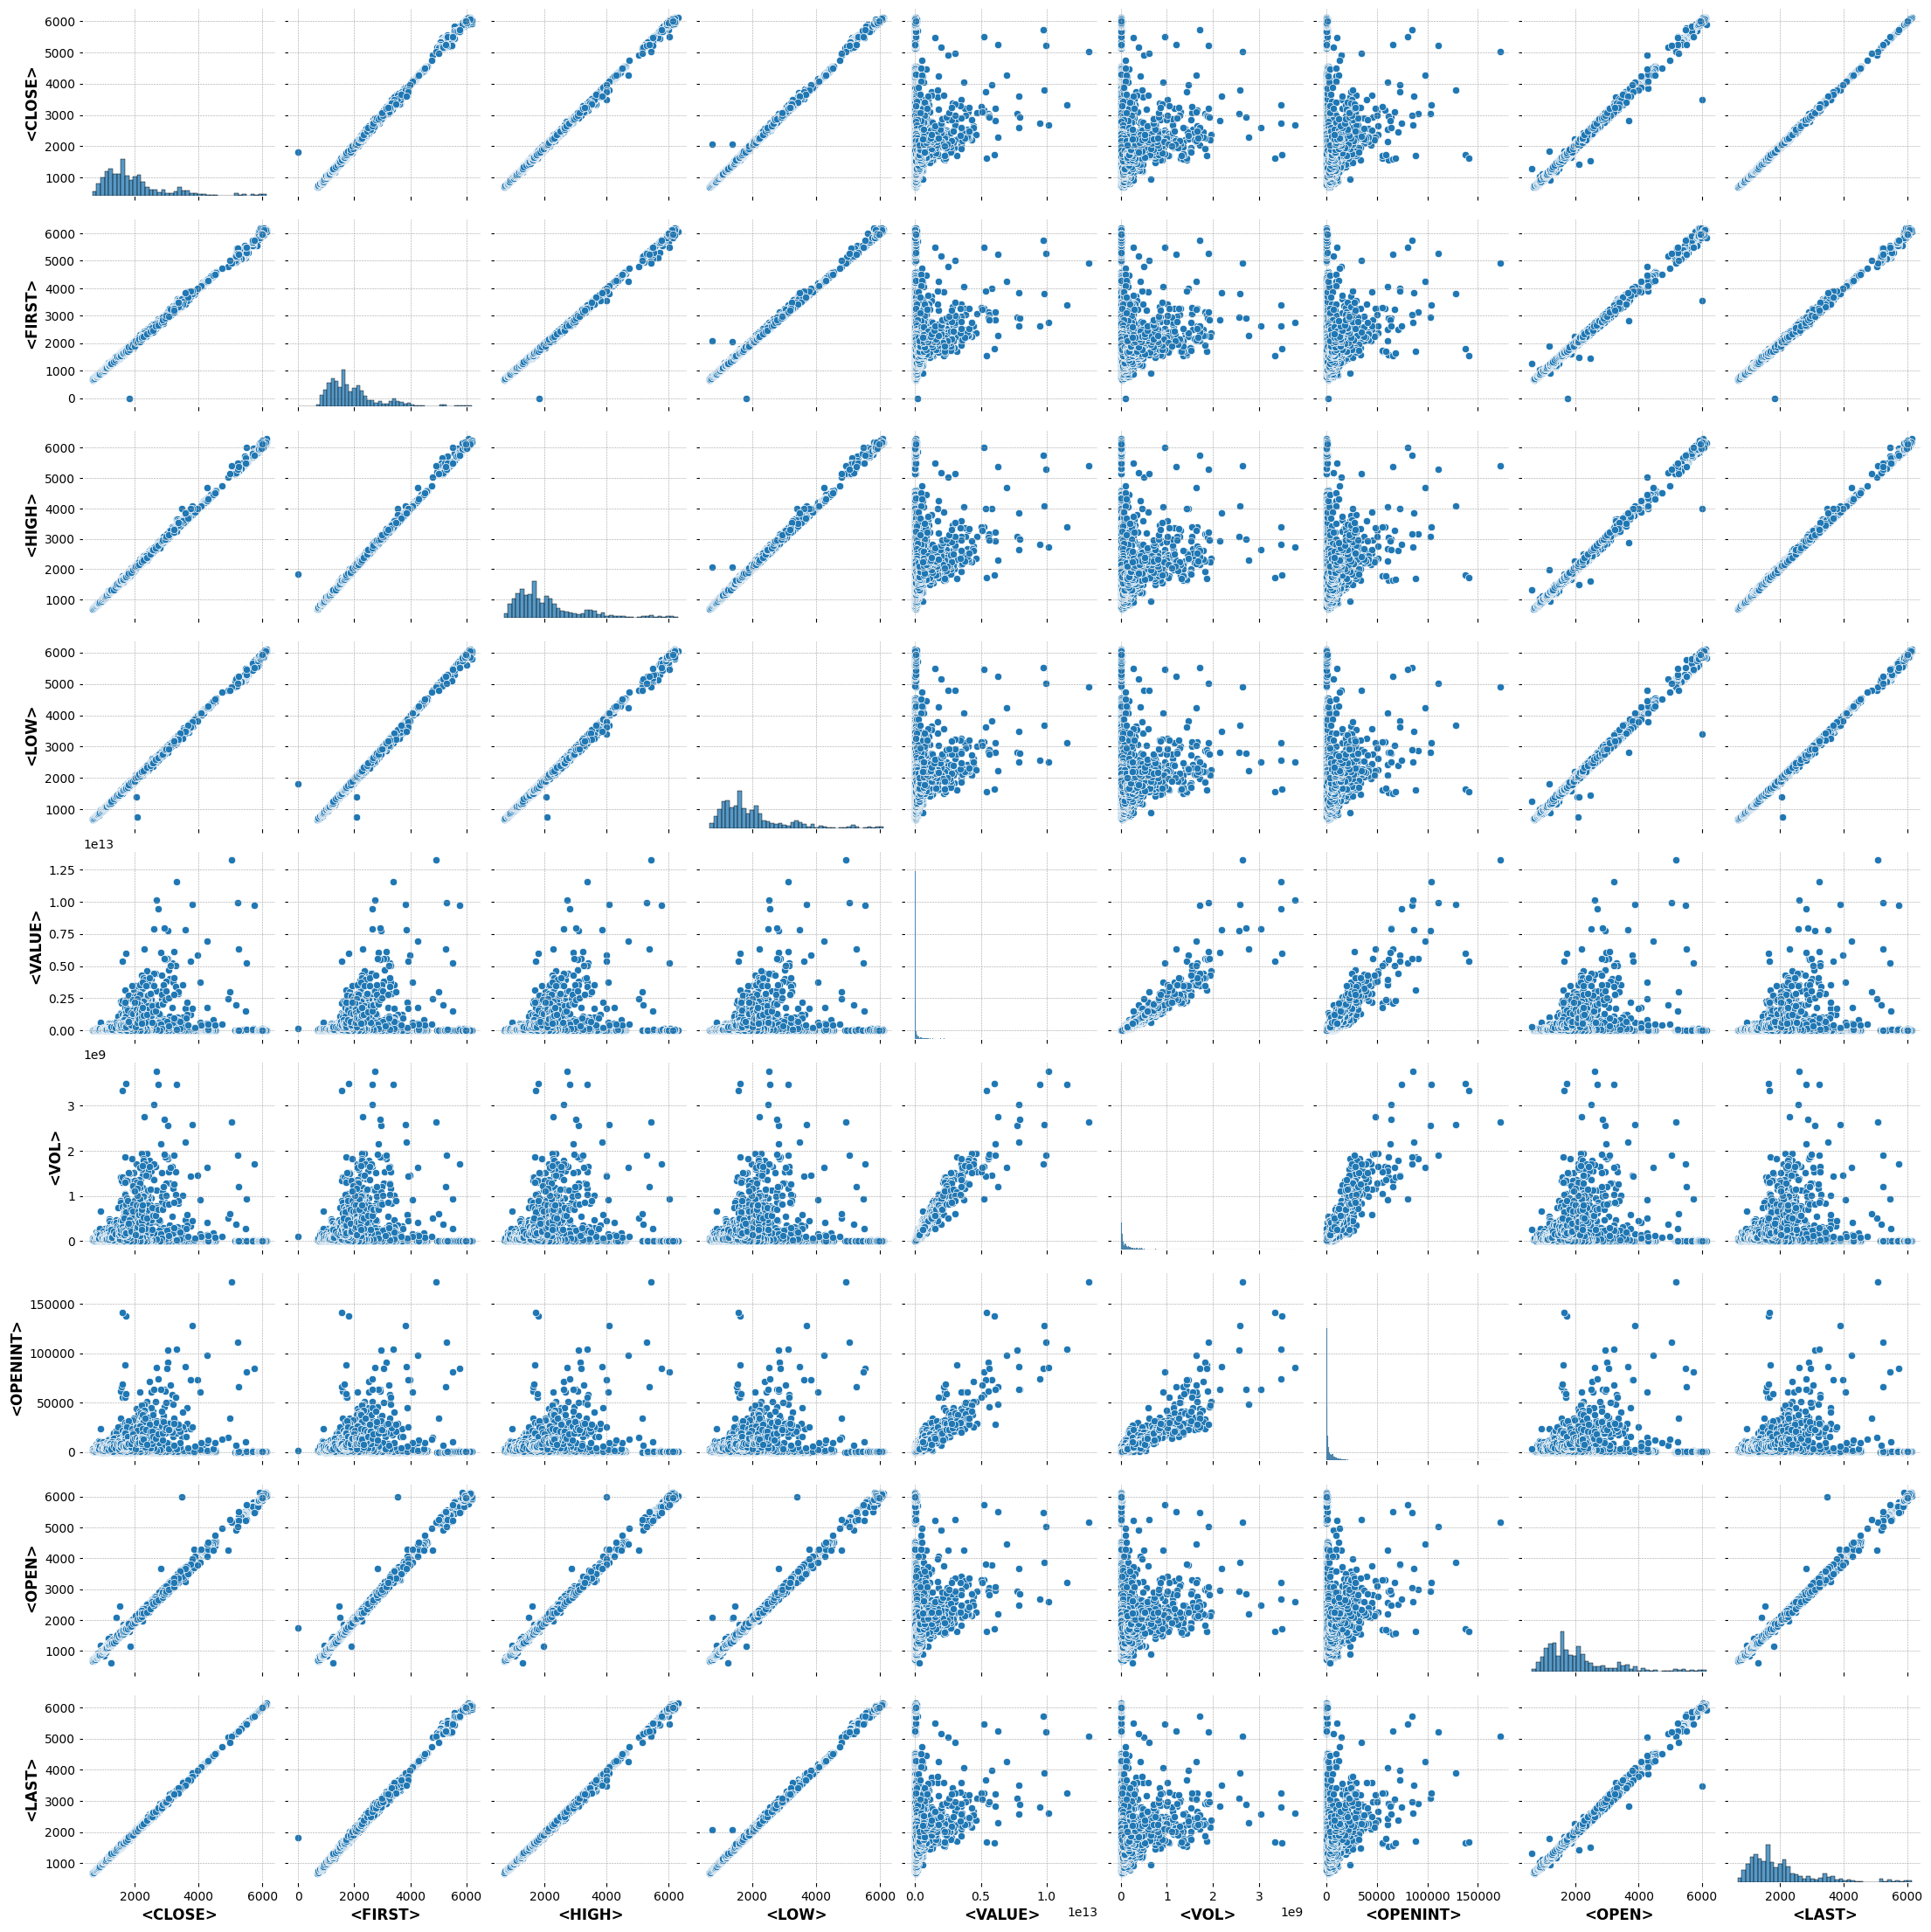

In [107]:
sns.pairplot(df[['<CLOSE>', '<FIRST>', '<HIGH>', '<LOW>','<VALUE>', '<VOL>', '<OPENINT>', '<PER>', '<OPEN>', '<LAST>']])

<Axes: xlabel='<DTYYYYMMDD>', ylabel='<CLOSE>'>

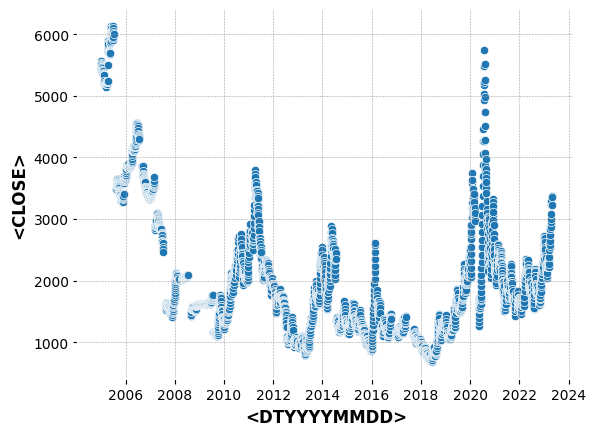

In [108]:
sns.scatterplot(data=df, x='<DTYYYYMMDD>', y='<CLOSE>')

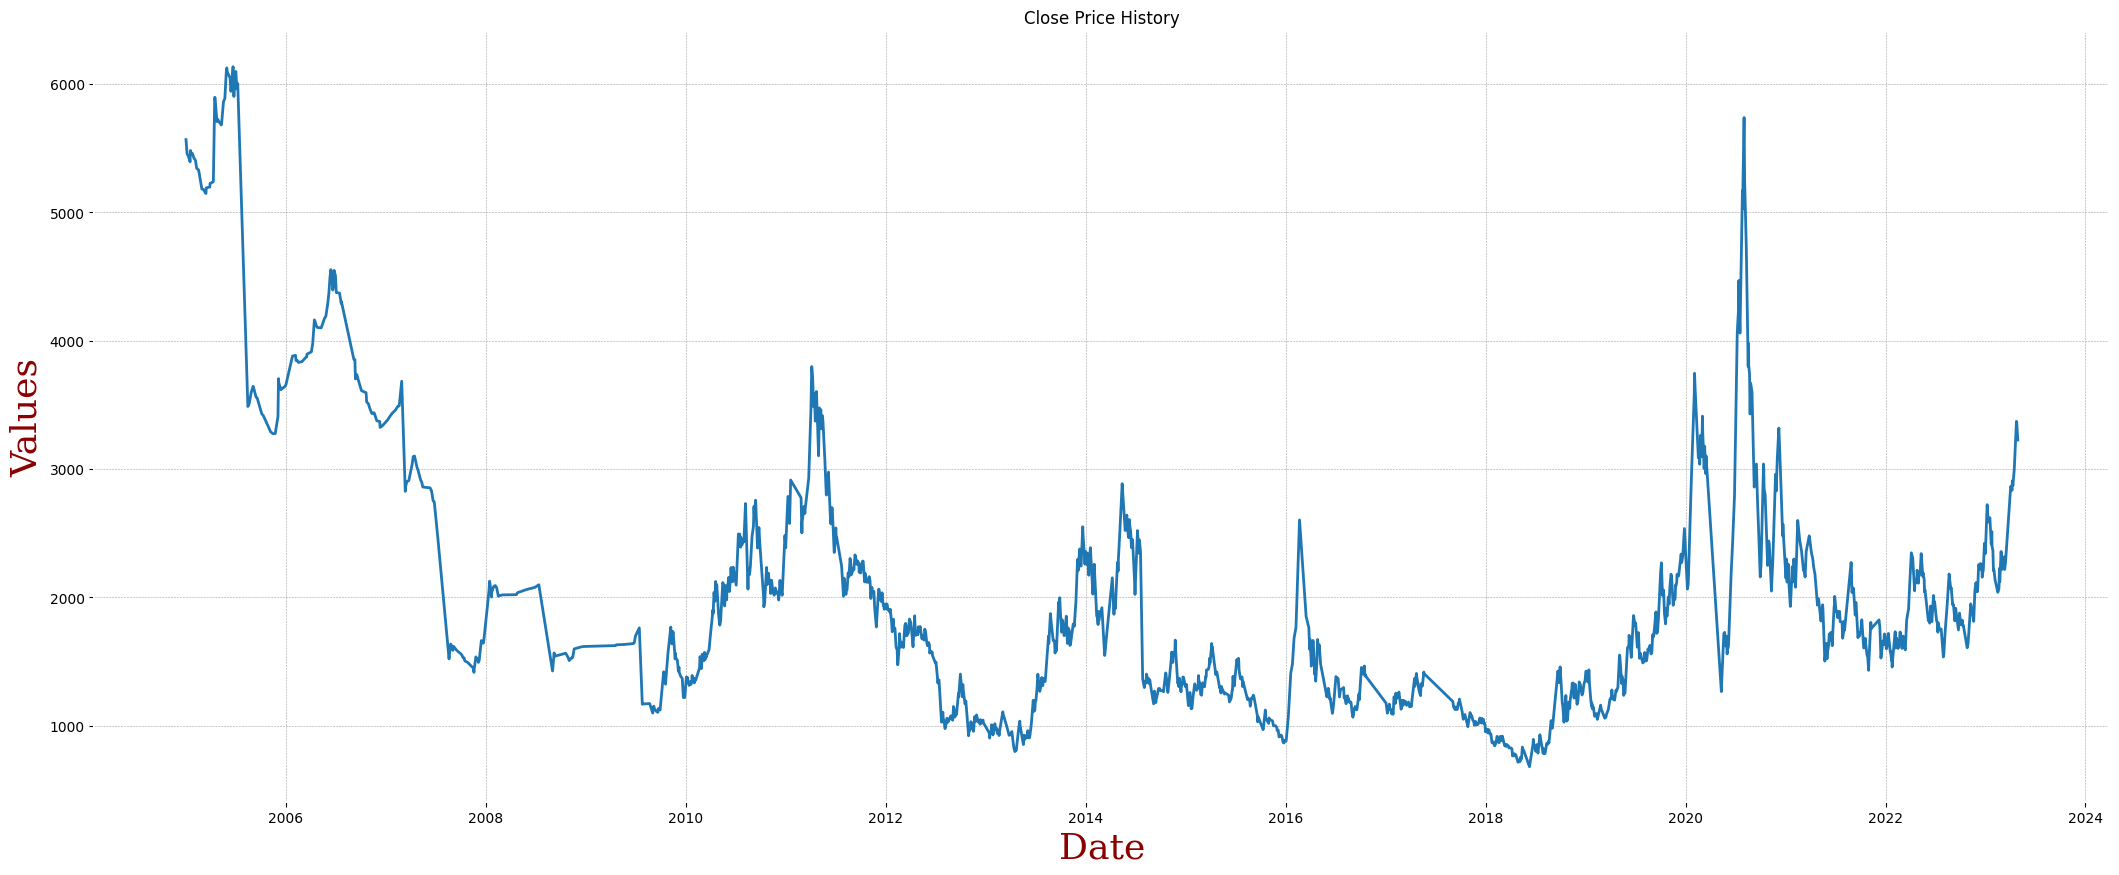

In [109]:

y = df['<CLOSE>']
x = df.index.name
plt.figure(figsize=(26,10))
plt.title('Close Price History')
plt.plot(df.index,df['<CLOSE>'])
plt.xlabel('Date', fontdict = fontx)
plt.ylabel('Values', fontdict = fonty)
plt.show()

### **Change Column NAME**

In [110]:
data=df.rename(columns={'<OPEN>':'Open', '<HIGH>': 'High','<LOW>': 'Low', 
                       '<CLOSE>' : 'Close','<VOL>':'Volume'}, errors="raise")

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3878 entries, 2005-01-01 to 2023-04-29
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   3878 non-null   object 
 1   <FIRST>    3878 non-null   float64
 2   High       3878 non-null   float64
 3   Low        3878 non-null   float64
 4   Close      3878 non-null   float64
 5   <VALUE>    3878 non-null   int64  
 6   Volume     3878 non-null   int64  
 7   <OPENINT>  3878 non-null   int64  
 8   <PER>      3878 non-null   object 
 9   Open       3878 non-null   float64
 10  <LAST>     3878 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 363.6+ KB


### **Filter Data**

In [111]:
dt_range = pd.date_range(start="20210301", end="20210331")
data = data[data.index.isin(dt_range)]
data.head()

,<TICKER>,<FIRST>,High,Low,Close,<VALUE>,Volume,<OPENINT>,<PER>,Open,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2021-03-01,S*Saipa,2320.0,2320.0,2320.0,2320.0,314419856000,135525800,2005,D,2360.0,2320.0
2021-03-02,S*Saipa,2280.0,2360.0,2280.0,2290.0,2040852201010,891542657,22652,D,2320.0,2280.0
2021-03-03,S*Saipa,2270.0,2290.0,2250.0,2260.0,201944767810,89380556,2057,D,2290.0,2250.0
2021-03-06,S*Saipa,2220.0,2220.0,2220.0,2250.0,42092776200,18960710,682,D,2260.0,2220.0
2021-03-07,S*Saipa,2210.0,2240.0,2210.0,2210.0,1163847453470,526326291,10331,D,2250.0,2210.0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2021-03-01 to 2021-03-31
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   17 non-null     object 
 1   <FIRST>    17 non-null     float64
 2   High       17 non-null     float64
 3   Low        17 non-null     float64
 4   Close      17 non-null     float64
 5   <VALUE>    17 non-null     int64  
 6   Volume     17 non-null     int64  
 7   <OPENINT>  17 non-null     int64  
 8   <PER>      17 non-null     object 
 9   Open       17 non-null     float64
 10  <LAST>     17 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ KB


### **Plot Candlestick with mlpfinance library**




In [113]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


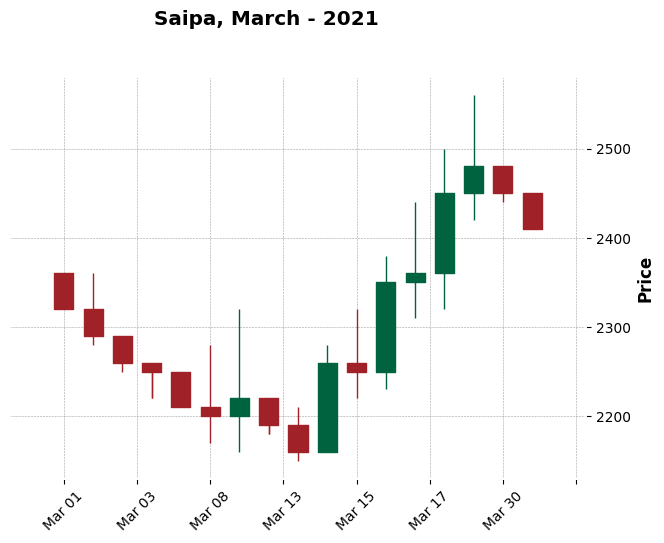

In [114]:
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='charles',
            title='Saipa, March - 2021',
            ylabel='Price'
        )

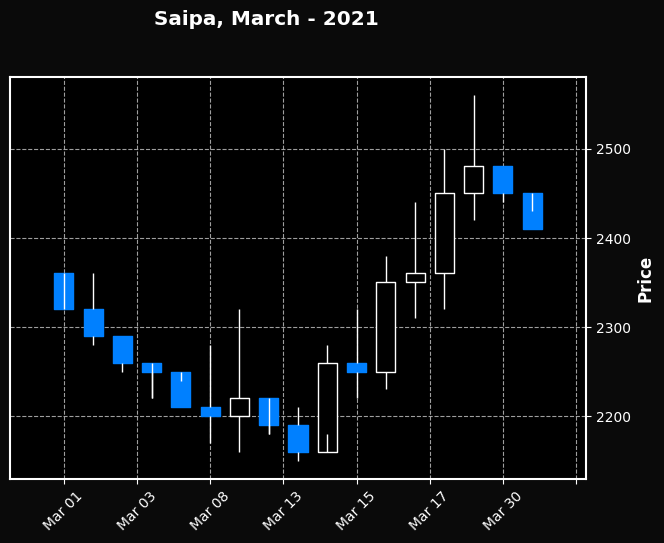

In [115]:
fplt.plot(
            data,
            type='candle',
            style='mike',
            title='Saipa, March - 2021',
            ylabel='Price',
        )

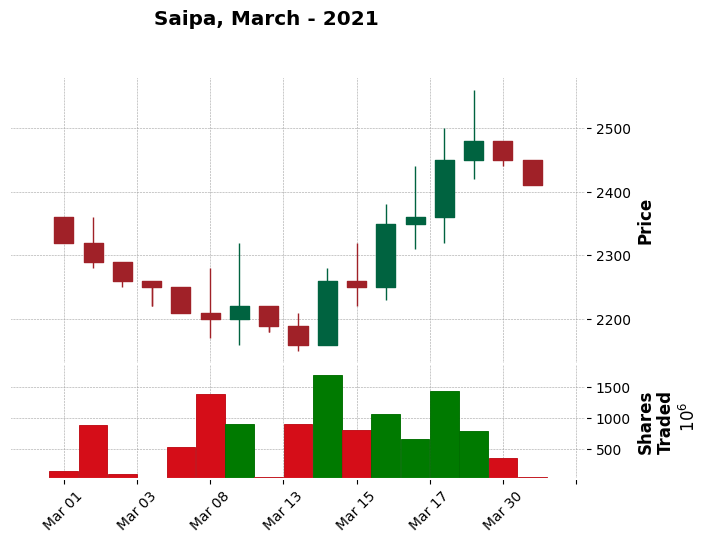

In [116]:
fplt.plot(
            data,
            type='candle',
            style='charles',
            title='Saipa, March - 2021',
            ylabel='Price',
            volume=True,
            ylabel_lower='Shares\nTraded',
            )

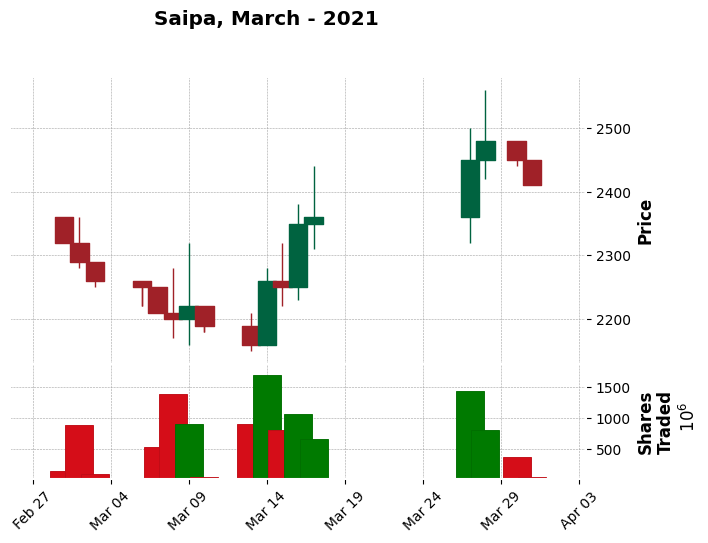

In [117]:
fplt.plot(
            data,
            type='candle',
            style='charles',
            title='Saipa, March - 2021',
            ylabel='Price',
            volume=True,
            ylabel_lower='Shares\nTraded',
            show_nontrading=True
            )

remove last data for Final test

In [118]:
df.shape

(3878, 11)

In [119]:



data = df.filter(['<CLOSE>'])

dataset = data.values

trainingDataLen = math.ceil(len(dataset)*.8)

scalar = MinMaxScaler(feature_range=(0,1))

scaled_data = scalar.fit_transform(dataset)


print(scaled_data.shape)

(3878, 1)


In [120]:


train_data = scaled_data[0:trainingDataLen,:]

x_train = []
y_train = []


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


type(x_train)

  

list

In [121]:
x_train , y_train = np.array(x_train) ,np.array(y_train) 

type(x_train)

numpy.ndarray

In [122]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(3043, 60, 1)

In [123]:

model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(LSTM(50,return_sequences=False))

model.add(Dense(25))

model.add(Dense(12))

model.add(Dense(1))


In [124]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [125]:
model.fit(x_train,y_train,batch_size=1,epochs=2)



Epoch 1/2
3043/3043 [==============================] - 140s 42ms/step - loss: 0.0018
Epoch 2/2
3043/3043 [==============================] - 104s 34ms/step - loss: 7.5614e-04


In [126]:
test_data=scaled_data[trainingDataLen-60:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[trainingDataLen:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

835
835


In [127]:
x_test=np.array(x_test)

In [128]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [129]:
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)


25/25 [==============================] - 1s 18ms/step


In [130]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

53.26743778351815

<ipython-input-131-c5db0c24534c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


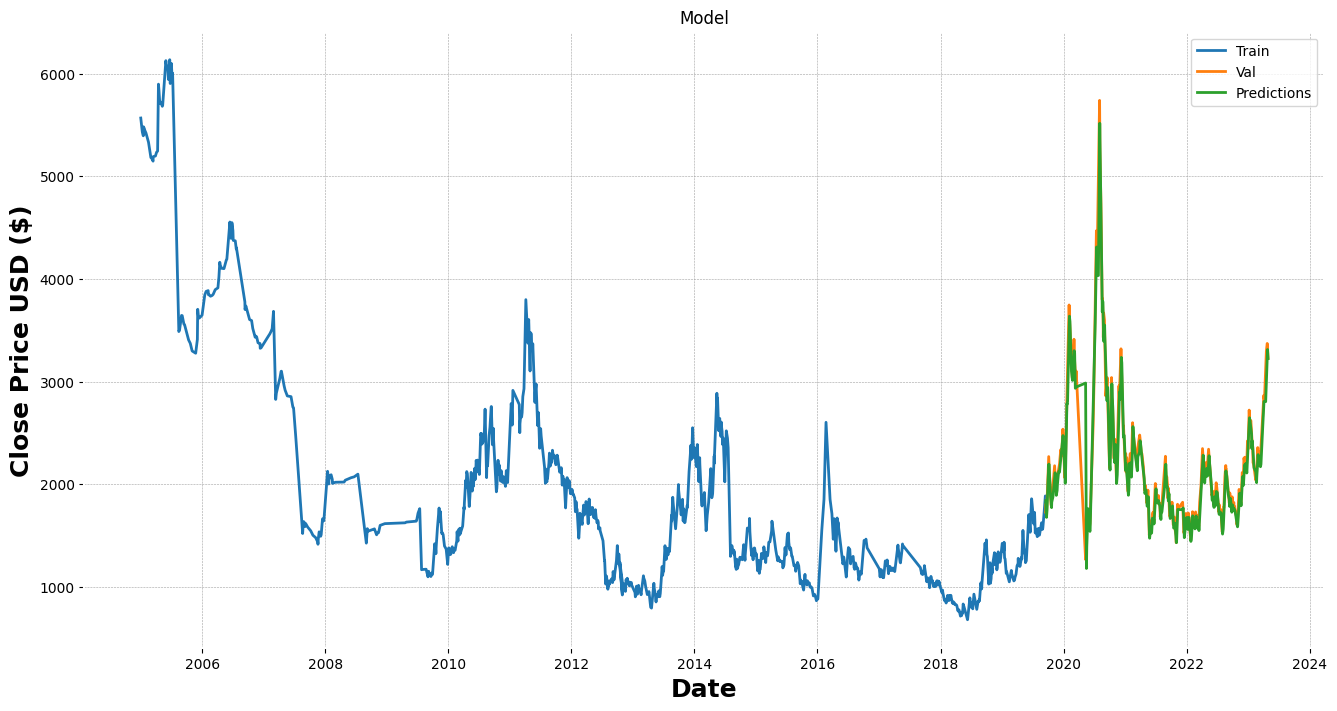

In [131]:
#Plot the data



train=data[:trainingDataLen]
valid=data[trainingDataLen:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['<CLOSE>'])
plt.plot(valid[['<CLOSE>', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [132]:
# aapl = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
df = pd.read_csv('S_Saipa.csv',index_col='<DTYYYYMMDD>', parse_dates=True)
df = df.sort_index()
finalData = df.tail(1)
df = df.drop(finalData.index)
# Create a new data frame
new_df=df.filter(['<CLOSE>'])


# Get the last 60 day Closing price values and convert the dataframe to an array

# last_60_days=new_df[-60:].values

last_60_days = new_df.tail(60).values

# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)

print(pred_price)



1/1 [==============================] - 0s 38ms/step
[[3225.0654]]


In [133]:
print(finalData['<CLOSE>'])

<DTYYYYMMDD>
2023-04-29    3227.0
Name: <CLOSE>, dtype: float64
